In [25]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [26]:
# Download latest Covid 19 data
df = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
# Downloaded population from World Bank
# http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
pop = pd.read_csv("population.csv", skiprows=4)
pop = pop.set_index('Country Name')

In [102]:
def covid(values, since, countries, by_pop):
    # filter by date
    df2 = df[df.date > since]
    # generate a pivot chart
    piv = df2.pivot(index='date', columns='location', values=values)
    # filter by country
    sub = piv[countries]
    # setup title of plot
    title=values + " since " + since
    if (by_pop == 1):
        # divide each number by the population, in millions
        pop2 = pop.loc[countries, ['2018']]
        pop2 = pop2/1e6
        pop2 = pop2.transpose()
        sub = sub/pop2.iloc[0]
        title = title + " per million of population"
    return sub, title

In [117]:
# Default values
values = 'new_cases'
since = '2020-01-17'
countries=['Italy','Spain','United Kingdom','Ireland','China','United States']

# Set the default size for the figures
plt.rcParams["figure.figsize"] = (14, 10)

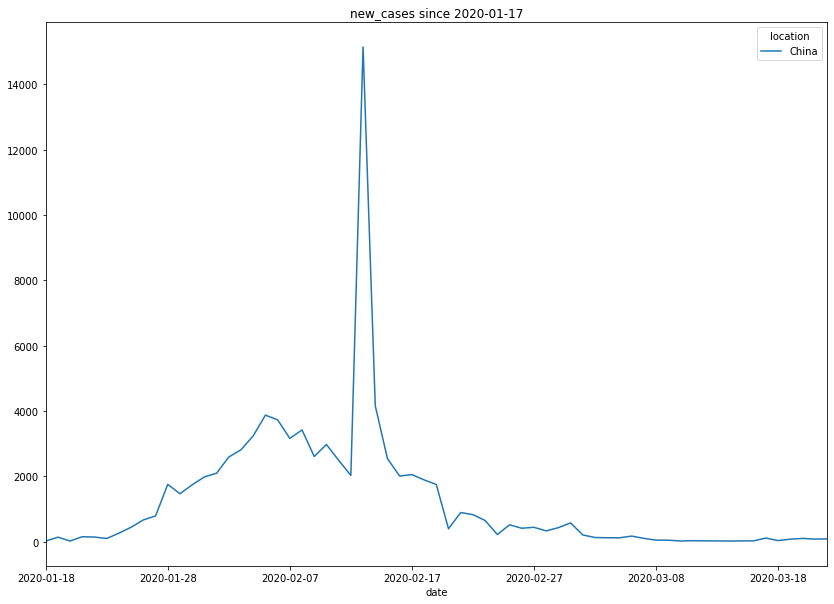

In [118]:
sub, title = covid(values, since, countries, by_pop=0)
sub.plot(title=title)

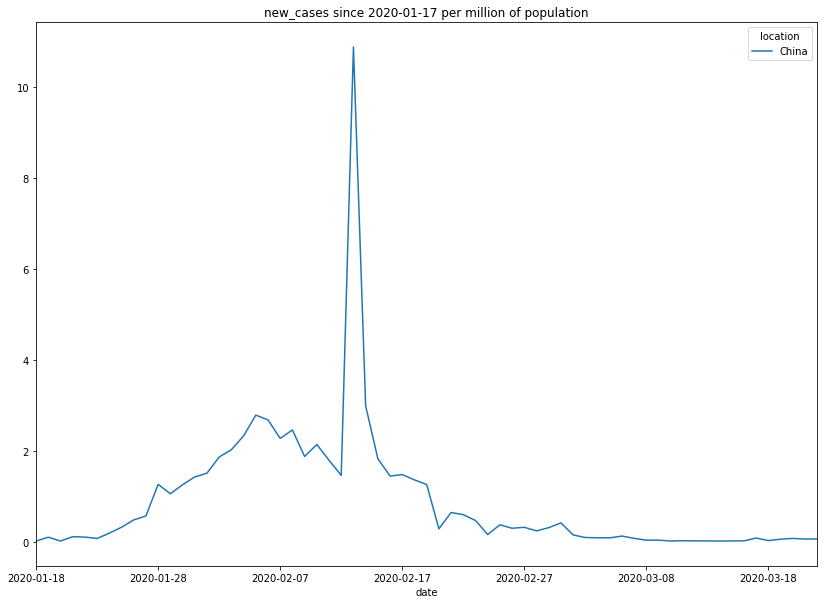

In [119]:
sub, title = covid(values, since, countries, by_pop=1)
sub.plot(title=title)

In [120]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
6266,2020-03-20,Zambia,0,0,2,0
6267,2020-03-21,Zambia,0,0,2,0
6268,2020-03-22,Zambia,0,0,2,0
6269,2020-03-21,Zimbabwe,1,0,1,0
